In [1]:
import math
import pandas_datareader as web
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import yfinance as yf

plt.style.use('fivethirtyeight')

In [2]:

# Pulled data from Yahoo Finance
df = yf.download('^SP100',start = '2008-01-01', end = '2022-12-31')

print('Number of rows and columns: ', df.shape)
print(df.head())
print("checking if any null values are present\n", df.isna().sum())

[*********************100%***********************]  1 of 1 completed
Number of rows and columns:  (3777, 6)
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2008-01-02  685.469971  687.469971  673.330017  675.950012  675.950012   
2008-01-03  676.000000  680.409973  674.390015  676.119995  676.119995   
2008-01-04  674.409973  674.409973  660.340027  660.729980  660.729980   
2008-01-07  661.989990  666.679993  657.390015  662.940002  662.940002   
2008-01-08  662.630005  669.330017  649.770020  651.020020  651.020020   

                Volume  
Date                    
2008-01-02  3452650000  
2008-01-03  3429500000  
2008-01-04  4166000000  
2008-01-07  4221260000  
2008-01-08  4705390000  
checking if any null values are present
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


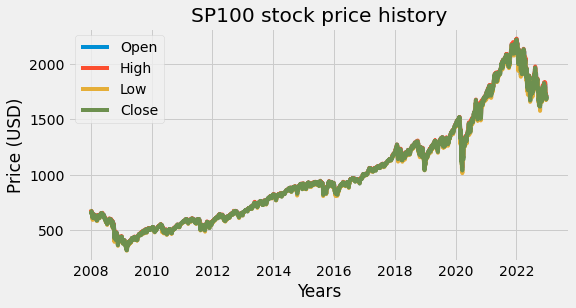

In [19]:
plt.figure(figsize = (8,4))
plt.plot(df["Open"])
plt.plot(df["High"])
plt.plot(df["Low"])
plt.plot(df["Close"])
plt.title('SP100 stock price history')
plt.ylabel('Price (USD)')
plt.xlabel('Years')
plt.legend(['Open','High','Low','Close'], loc='upper left')
plt.show()

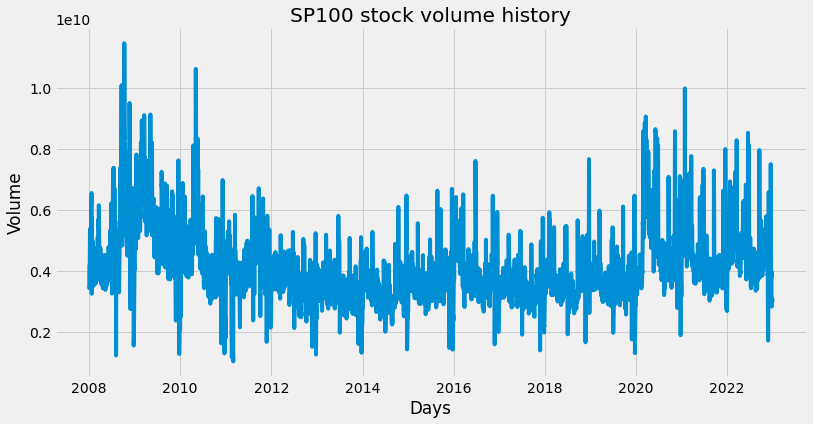

In [4]:
plt.figure(figsize = (12,6))
plt.plot(df["Volume"])
plt.title('SP100 stock volume history')
plt.ylabel('Volume')
plt.xlabel('Days')
plt.show()

In [5]:
# Create a dataframe with only the Close Stock Price Column
data_target = df.filter(['Close'])

# Convert the dataframe to a numpy array to train the LSTM model
target = data_target.values

# Splitting the dataset into training and test
# Target Variable: Close stock price value

training_data_len = math.ceil(len(target)* 0.75) # training set has 75% of the data
training_data_len

# Normalizing data before model fitting using MinMaxScaler
# Feature Scaling

sc = MinMaxScaler(feature_range=(0,1))
training_scaled_data = sc.fit_transform(target)
training_scaled_data

array([[0.18648509],
       [0.18657468],
       [0.17846319],
       ...,
       [0.71596633],
       [0.73216821],
       [0.73105612]])

In [6]:
train_data = training_scaled_data[0:training_data_len  , : ]

X_train = []
y_train = []
for i in range(180, len(train_data)):
    X_train.append(train_data[i-180:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train) # converting into numpy sequences to train the LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print('Number of rows and columns: ', X_train.shape)  #( 180 time-steps, 1 output)

Number of rows and columns:  (2653, 180, 1)


In [7]:
!pip install -U protobuf==3.8.0

In [8]:
# We add the LSTM layer and later add a few Dropout layers to prevent overfitting.
# Building a LTSM model with 50 neurons and 4 hidden layers. We add the LSTM layer with the following arguments:
# 50 units which is the dimensionality of the output space
# return_sequences=True which determines whether to return the last output in the output sequence, or the full sequence input_shape as the shape of our training set.
# When defining the Dropout layers, we specify 0.2, meaning that 20% of the layers will be dropped.
# Thereafter, we add the Dense layer that specifies the output of 1 unit.
# After this, we compile our model using the popular adam optimizer and set the loss as the mean_squarred_error.

model = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
83/83 [==============================] - 77s 515ms/step - loss: 0.0052
Epoch 2/100
83/83 [==============================] - 44s 534ms/step - loss: 0.0011
Epoch 3/100
83/83 [==============================] - 43s 519ms/step - loss: 9.5648e-04
Epoch 4/100
83/83 [==============================] - 45s 539ms/step - loss: 7.3639e-04
Epoch 5/100
83/83 [==============================] - 43s 513ms/step - loss: 6.6682e-04
Epoch 6/100
83/83 [==============================] - 45s 538ms/step - loss: 6.2253e-04
Epoch 7/100
83/83 [==============================] - 43s 523ms/step - loss: 7.0455e-04
Epoch 8/100
83/83 [==============================] - 44s 533ms/step - loss: 6.0174e-04
Epoch 9/100
83/83 [==============================] - 43s 516ms/step - loss: 6.1068e-04
Epoch 10/100
83/83 [==============================] - 44s 535ms/step - loss: 5.7607e-04
Epoch 11/100
83/83 [==============================] - 45s 540ms/step - loss: 4.8287e-04
Epoch 12/100
83/83 [=============================

In [9]:
# Getting the predicted stock price
test_data = training_scaled_data[training_data_len - 180: , : ]

#Create the x_test and y_test data sets
X_test = []
y_test =  target[training_data_len : , : ]
for i in range(180,len(test_data)):
    X_test.append(test_data[i-180:i,0])

# Convert x_test to a numpy array
X_test = np.array(X_test)

#Reshape the data into the shape accepted by the LSTM
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
print('Number of rows and columns: ', X_test.shape)

Number of rows and columns:  (944, 180, 1)


In [10]:
# Making predictions using the test dataset
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

30/30 [==============================] - 10s 165ms/step


C:\Users\sukhi\AppData\Local\Temp/ipykernel_13576/4158741381.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predicted_stock_price


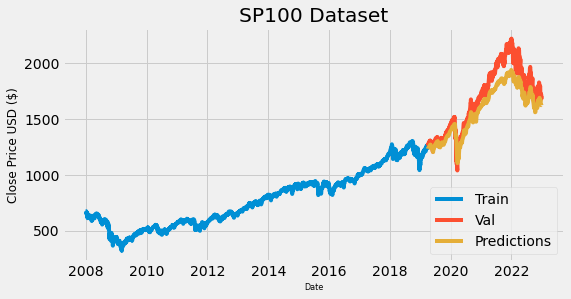

In [20]:
# Visualising the results
train = data_target[:training_data_len]
valid = data_target[training_data_len:]
valid['Predictions'] = predicted_stock_price
plt.figure(figsize=(8,4))
plt.title('SP100 Dataset')
plt.xlabel('Date', fontsize=8)
plt.ylabel('Close Price USD ($)', fontsize=12)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [12]:
valid

,Close,Predictions
Date,,
2019-04-04,1271.400024,1234.376587
2019-04-05,1275.540039,1238.402832
2019-04-08,1277.569946,1241.151123
2019-04-09,1270.670044,1243.045776
2019-04-10,1273.790039,1243.357910
...,...,...
2022-12-23,1710.709961,1624.283447
2022-12-27,1700.140015,1625.861572
2022-12-28,1680.540039,1626.910645


In [13]:
nsamples, nx, ny = X_test.shape
d2_train_dataset = X_test.reshape((nsamples,nx*ny))

In [14]:
rmse = np.sqrt(np.mean(predicted_stock_price - y_test)**2)  
rmse
     

103.31730380300748

In [15]:
import numpy as np

def mape(y_test, predicted_stock_price):
    y_test, predicted_stock_price = np.array(y_test), np.array(predicted_stock_price)
    mape = np.mean(np.abs((y_test - predicted_stock_price) / y_test))
    return mape

In [16]:
 mape = np.mean(np.abs((y_test - predicted_stock_price) / y_test))*100

In [17]:
 mape

5.85667498410884